In [1]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import re

import warnings
     

In [2]:
#loading the train and test data

train_df= pd.read_csv('train.csv')
test_df= pd.read_csv('test_with_no_labels.csv')

#finding the shape of the data
print(train_df.shape)
print(test_df.shape)

(15819, 3)
(10546, 2)


In [3]:
# checking thw train dataset
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [4]:
#checking the test dataset 
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [5]:
#checking for null 
train_df.isnull().any()
test_df.isnull().any()

message    False
tweetid    False
dtype: bool

In [6]:
# checking out the total number of tweets that does not believe in climate change 
# Anticlimate change (-1)

train_df[train_df['sentiment'] == -1].count()

sentiment    1296
message      1296
tweetid      1296
dtype: int64

In [7]:
# checking out the total number of tweets that neither supports nor refutes climate change 
# Nutral (0)

train_df[train_df['sentiment'] == 0].count()

sentiment    2353
message      2353
tweetid      2353
dtype: int64

In [8]:
# checking out the total number of tweets that supports climate change 
# Pro Climate Change (1)

train_df[train_df['sentiment'] == 1].count()

sentiment    8530
message      8530
tweetid      8530
dtype: int64

In [9]:
# checking out the total number of tweets links to factual news about climate change
# News on Climate (2)

train_df[train_df['sentiment'] == 2].count()

sentiment    3640
message      3640
tweetid      3640
dtype: int64

<AxesSubplot:>

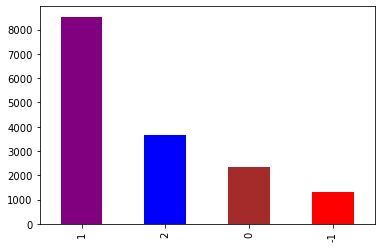

In [10]:
# graphical representation of the sentiment feature

train_df['sentiment'].value_counts().plot.bar(color = ['purple', 'blue', 'brown', 'red'], 
                                                figsize = (6, 4))

In [11]:
# adding a column to represent the length of the tweet

train_df['len'] = train_df['message'].str.len()
test_df['len'] = test_df['message'].str.len()

train_df.head(10)

,sentiment,message,tweetid,len
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,1,It's not like we lack evidence of anthropogeni...,126103,62
2,2,RT @RawStory: Researchers say we have three ye...,698562,140
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122
5,1,Worth a read whether you do or don't believe i...,425577,110
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,119
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,152
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,139
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,88


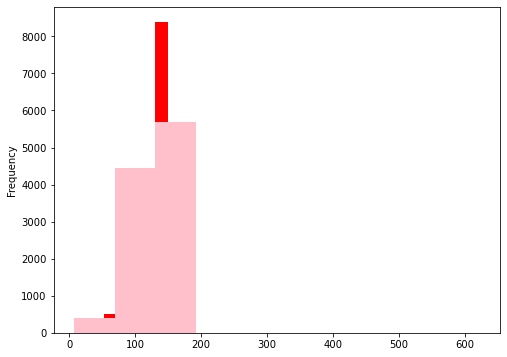

In [12]:
# graphically checking the distribution of messages in the data

length_train = train_df['message'].str.len().plot.hist(color = 'red', figsize = (8, 6))
length_test = test_df['message'].str.len().plot.hist(color = 'pink', figsize = (8, 6))

In [13]:
# checking the discriptive statistics

train_df.groupby('sentiment').describe().T

sentiment                 -1              0              1              2
tweetid count    1296.000000    2353.000000    8530.000000    3640.000000
        mean   499169.447531  496550.249894  507418.550762  492613.500275
        std    289509.003781  286519.834520  289537.581404  289163.550697
        min      1422.000000     229.000000       6.000000      86.000000
        25%    243479.250000  250733.000000  257622.750000  246628.250000
        50%    494572.000000  483496.000000  511867.500000  490980.000000
        75%    759714.750000  734897.000000  761983.500000  738188.500000
        max    999537.000000  999888.000000  999698.000000  999236.000000
len     count    1296.000000    2353.000000    8530.000000    3640.000000
        mean      123.725309     110.925202     128.970692     119.919780
        std        24.293352      32.362798      19.956673      19.002282
        min        34.000000      14.000000      22.000000      48.000000
        25%       114.000000      85.000000     123.000000     108.000000
        50%       135.000000     124.000000     137.000000     123.000000
        75%       140.000000     139.000000     140.000000     137.000000
        max       166.000000     174.000000     208.000000     166.000000

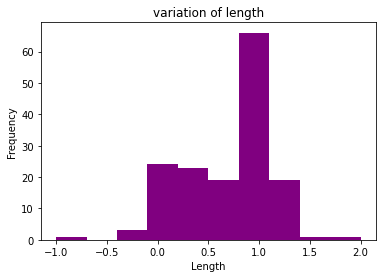

In [14]:
# checking the message length variation of the sentiments  of climate change 
train_df.groupby('len').mean()['sentiment'].plot.hist(color = 'purple', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

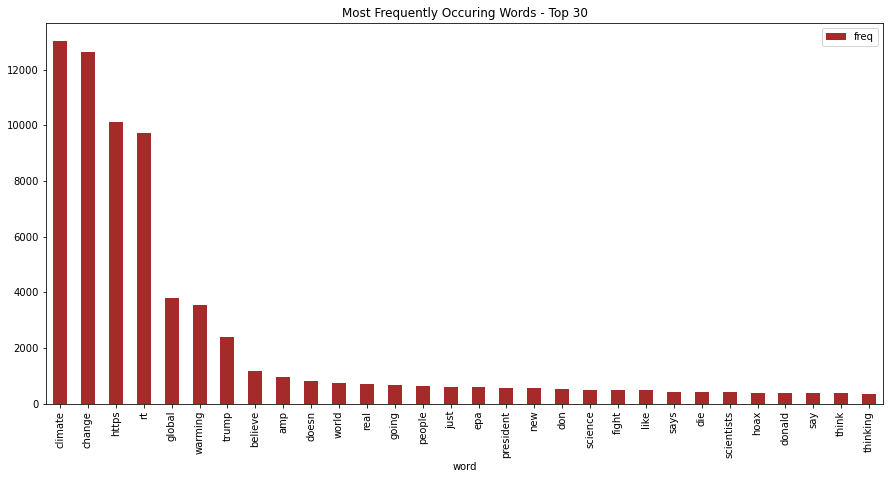

In [15]:
# checking the frequebcy distribution of each word in the train data using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer


cvector = CountVectorizer(stop_words = 'english')
words = cvector.fit_transform(train_df.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cvector.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'brown')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

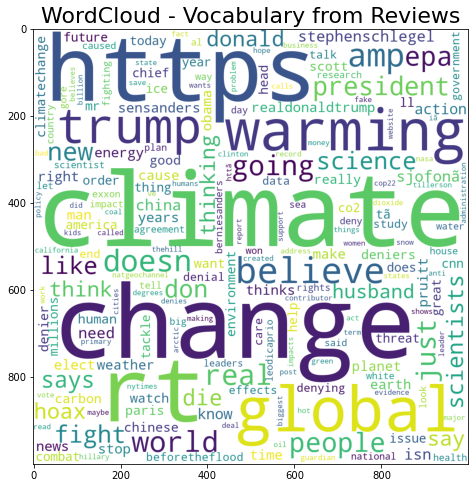

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', 
                      width = 1000, 
                      height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)
     

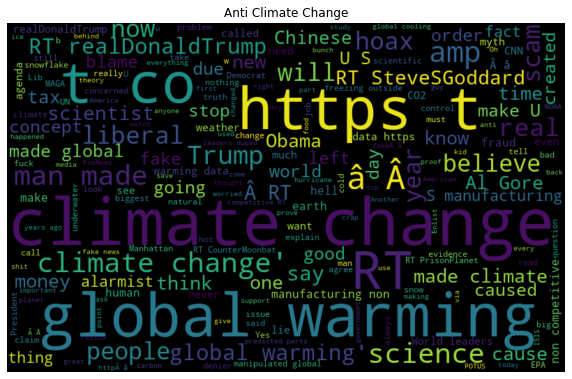

In [17]:
# checking the normal words used by Anti climate change messages using wordcloud
normal_words =' '.join([text for text in train_df['message'][train_df['sentiment'] == -1]])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Anti Climate Change')
plt.show()

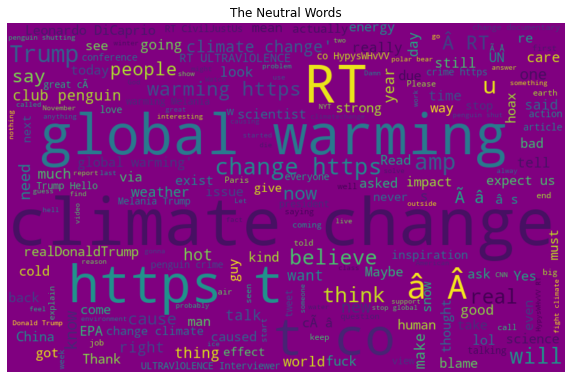

In [18]:
# checking the naumal words used by NUTRAL messages using wordcloud
normal_words =' '.join([text for text in train_df['message'][train_df['sentiment'] == 0]])

wordcloud = WordCloud(background_color = 'purple',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

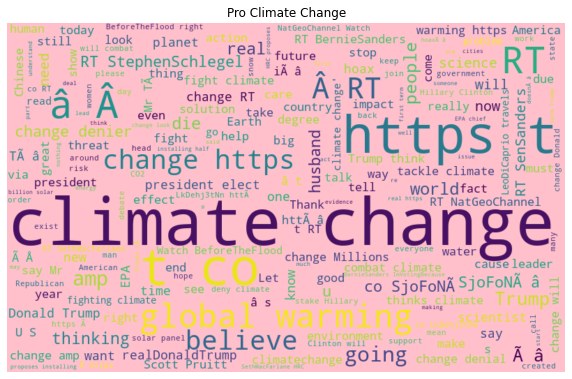

In [19]:
# checking the normal words used by Pro Climate Change using wordcloud
normal_words =' '.join([text for text in train_df['message'][train_df['sentiment'] == 1]])

wordcloud = WordCloud(background_color = 'pink',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Pro Climate Change')
plt.show()

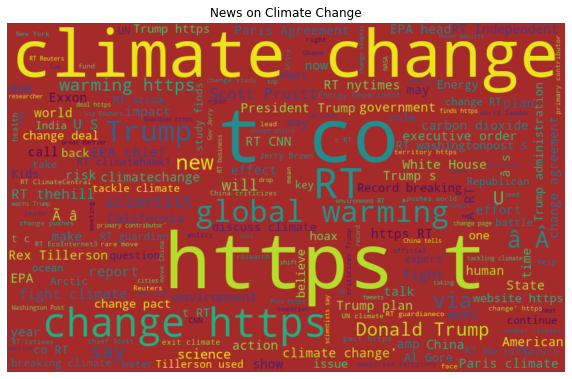

In [20]:
# checking the normal words used by News on Climate Change using wordcloud
normal_words =' '.join([text for text in train_df['message'][train_df['sentiment'] == 2]])

wordcloud = WordCloud(background_color = 'brown',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('News on Climate Change')
plt.show()

In [21]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [22]:
# extracting hashtags from anti climate change sentiment
HT_anti = hashtag_extract(train_df['message'][train_df['sentiment'] == -1])

# extracting hashtags from neutral on climent change sentiment
HT_neutral = hashtag_extract(train_df['message'][train_df['sentiment'] == 0])

# extracting hashtags from pro climent change sentiment
HT_pro = hashtag_extract(train_df['message'][train_df['sentiment'] == 1])

# extracting hashtags from news on climent change sentiment
HT_news = hashtag_extract(train_df['message'][train_df['sentiment'] == 2])

# unnesting list
HT_anti = sum(HT_anti, [])
HT_neutral = sum(HT_neutral, [])
HT_pro = sum(HT_pro, [])
HT_news = sum(HT_news, [])
     

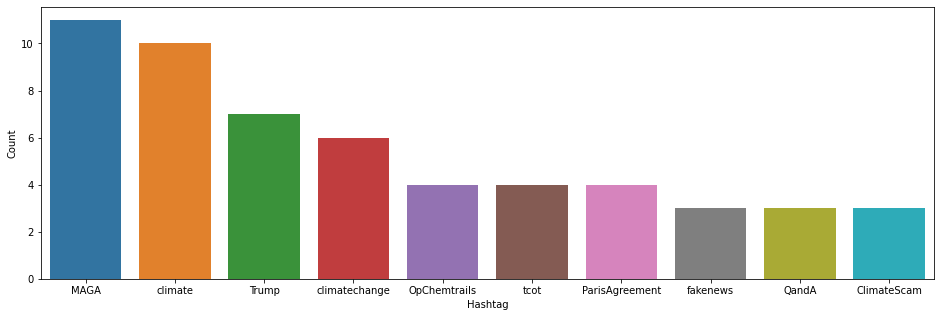

In [23]:
a = nltk.FreqDist(HT_anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

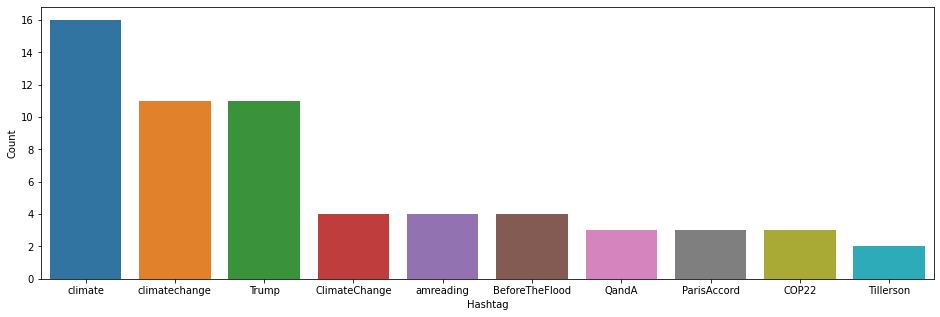

In [24]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

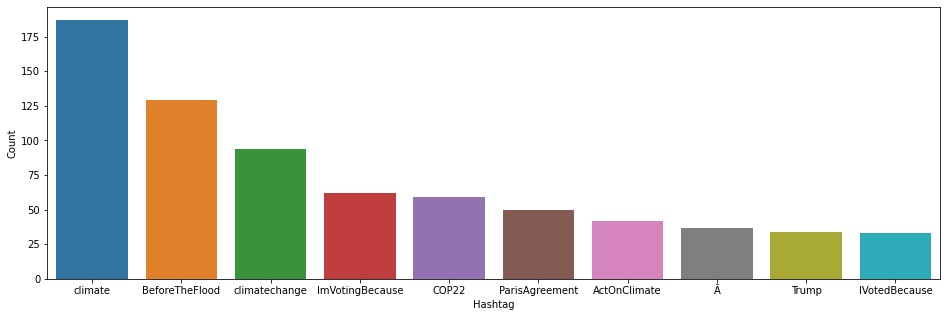

In [25]:
a = nltk.FreqDist(HT_pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

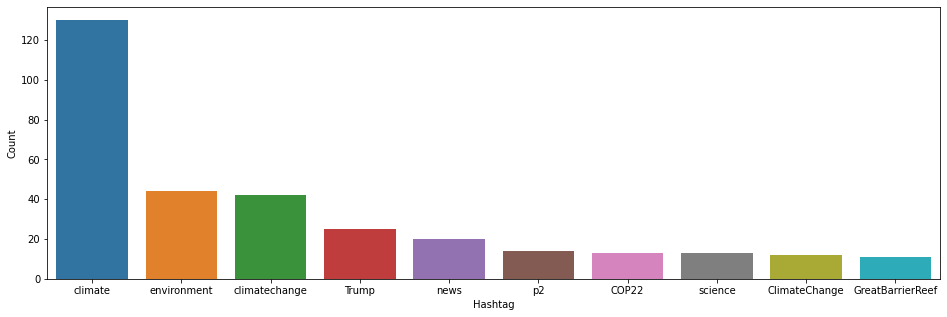

In [26]:
a = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Text Cleaning

### Removing Noise

In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. Some techniques are standard, but your own data will require some creative thinking on your part.

For the train dataset we will be doing the following steps:

- removing the web-urls
- making everything lower case
- removing punctuation
- removing printables 

#### Removing the web-urls

In [28]:
#removing noise and replacing with 'web-urls' in the train data set 

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = 'web-urls'
train_df['message'] = train_df['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)
    

In [29]:
#removing noise and replacing with 'web-urls' in the test data set 

pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = 'web-urls'
test_df['message'] = test_df['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)

In [30]:
# removing text before and including the colon (:) from the train data

train_df['message'] = train_df['message'].replace(r'^.+:', '', regex=True)

# removing text before and including the colon (:) from the test data

test_df['message'] = test_df['message'].replace(r'^.+:', '', regex=True)

In [31]:
# removing words that starts with '@' from the train data

pattern = r'@\w+'
subs = ''
train_df['message'] = train_df['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)

In [32]:
# removing words that starts with '@' from the test data

pattern = r'@\w+'
subs = ''
test_df['message'] = test_df['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)


In [33]:
# removing words that starts with '#' from the train data

patt = r'#\w+'
sub = ''
train_df['message'] = train_df['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)



In [34]:
# removing words that starts with '#' from the test data
patt = r'#\w+'
sub = ''
test_df['message'] = test_df['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)

In [35]:
# transforming the train data to lower case

train_df['message'] = train_df['message'].str.lower()

# transforming the test data to lower case
test_df['message'] = test_df['message'].str.lower()

#### Remove punctuation

In [36]:
#creating a function that removes punctuation from the data frame
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [37]:
# removing punctuation from the train data 
import string

train_df['message'] = train_df ['message'].apply(remove_punctuation)


# removing punctuation from the test data 

test_df['message'] = test_df ['message'].apply(remove_punctuation)

#### Removing Printables

In [38]:
from string import printable

# removing all ascii characters and printables from the train data using printable module
st = set(printable)
train_df['message']= train_df['message'].apply(
    lambda x: ''.join(["" if  i not in  st else i for i in x]))

# removing all ascii characters and printables from the test data using printable module
test_df['message']= test_df['message'].apply(
    lambda x: ''.join(["" if  i not in  st else i for i in x]))


### Tokenisation

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words" (see the Stanford Tokeniser). We will use tokenisers to clean up the data, making it ready for analysis.

In [39]:
# tokenizing the words present in the train data
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

tokeniser = TreebankWordTokenizer()

train_tokenized_message = train_df['message'].apply(tokeniser.tokenize)

# tokenizing the words present in the test data
test_tokenized_message = test_df['message'].apply(tokeniser.tokenize)


### Lemmatization

A very similar operation to stemming is called lemmatization. Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [40]:
# creating a lemmatization function 
from nltk.stem import WordNetLemmatizer    

### Stop Words

Stop words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information. nltk has a corpus of stopwords. Let's print out the stopwords for English.

In [41]:
# creating function to remove stop_words 

from nltk.corpus import stopwords

In [42]:
# removing stop words from the train data 
train_df_words = []

for i in range(0, 15819):
    update = re.sub('[^a-zA-Z]', ' ', train_df['message'][i])
    update = update.lower()
    update = update.split()
    
    lemmatizer = WordNetLemmatizer()
  
  # lemmatizing 
    update = [lemmatizer.lemmatize(word) for word in update if not word in 
              set(stopwords.words('english'))]
  
  # joining them back with space
    update = ' '.join(update)
    train_df_words.append(update)



In [43]:
# removing stop words from the test data 
test_df_words = []

for i in range(0, 10546):
    update = re.sub('[^a-zA-Z]', ' ', test_df['message'][i])
    update = update.lower()
    update = update.split()
    
    lemmatizer = WordNetLemmatizer()
  
  # lemmatizing 
    update = [lemmatizer.lemmatize(word) for word in update if not word in 
              set(stopwords.words('english'))]
  
  # joining them back with space
    update = ' '.join(update)
    test_df_words.append(update)


#### Bag of Words 
- Countvectorizer

In [50]:
# creating bag of words for the train data

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(train_df_words).toarray()
y = train_df.iloc[:,0]
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [51]:
# creating bag of words for the test data

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_df_words).toarray()

print(x_test.shape)

(10546, 2500)


In [52]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.20, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)
     

(12655, 2500)
(3164, 2500)
(12655,)
(3164,)


In [53]:
# standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [58]:
# traing models 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9073093638877914
Validation Accuracy : 0.6264222503160556
f1 score : 0.6264222503160556
[[ 121   46   94   17]
 [  51  174  164   36]
 [ 133  184 1230  208]
 [  28   38  183  457]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [57]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred,
                             pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9687870406953774
Validation Accuracy : 0.6833122629582806
F1 score : 0.6833122629582806
[[  75   56  133   14]
 [  10  203  193   19]
 [  30  165 1412  148]
 [   5   31  198  472]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9687870406953774
Validation Accuracy : 0.606826801517067
f1 score : 0.606826801517067
[[  73   65  120   20]
 [  32  198  175   20]
 [  88  269 1224  174]
 [   5   65  211  425]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [60]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred,
                            pos_label='positive',
                             average='micro'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.8525483998419597
Validation Accuracy : 0.6776232616940582
f1 score : 0.6776232616940582
[[  46   11  217    4]
 [   3   77  339    6]
 [   3   17 1631  104]
 [   1    1  314  390]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
